# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [48]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
# Create two new dataframes
north_df = pd.read_csv(r"C:\Users\holme\OneDrive\Desktop\LaunchCode\call-center-cleanup-assignment\NorthCallCenter.csv")
south_df = pd.read_csv(r"C:\Users\holme\OneDrive\Desktop\LaunchCode\call-center-cleanup-assignment\SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [49]:
# EDA Question 1A solution below:
north_rep_count = north_df['Rep ID'].nunique()
north_rep_count

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [50]:
# EDA Question 1B solution Below:
south_rep_count = south_df['Rep ID'].nunique()
south_rep_count

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [51]:
# EDA Question 2A solution Below:
# north_df.head()
north_avg = north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].agg('mean').round(2)
north_avg

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [52]:
# EDA Question 2B solution Below:
south_avg = south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].agg('mean').round(2)
south_avg

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [53]:
# EDA Question 3 solution Below:
combined_df = pd.concat([north_df, south_df])
call_block = combined_df.groupby("Time Block")["Calls"].sum().reset_index()
call_block

,Time Block,Calls
0,10:00 AM,99
1,11:00 AM,56
2,12:00 PM,120
3,1:00 PM,40
4,2:00 PM,65
5,3:00 PM,73
6,4:00 PM,53
7,5:00 PM,43
8,9:00 AM,10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [54]:
# Question 1 solution below
# Checks the combined data frame or nulls and adds them up.
combined_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       351
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: Yes, there is missing data in the "Incoming Wait Time" column. To handle this I would fill in all the blanks with 0.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [55]:
# Cleaning Question 2 solution below
north_df['Sale'] = north_df['Sale'].str.strip()

##### Record your answer by below:
> Your Answer: There are two separate "YES" values because there is one with white space. To fix this I need to strip the white space.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [56]:
# Cleaning Question 3 solution below:
north_dup = north_df.duplicated().sum()
display(north_dup)

south_dup = south_df.duplicated().sum()
display(south_dup)

np.int64(0)

np.int64(0)

##### Record your answer below:
> Your Answer: There are no duplicates in the dataset but, If there were I would handle this be using the drop_duplicates() function.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [57]:
# Cleaning Question 4 solution below:
north_df =  north_df.drop(columns=["Unnamed: 0"])
display(north_df)
south_df =  south_df.drop(columns=["Unnamed: 0"])
display(south_df)  

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


##### Record your answer below:
> Your Answer: The "Unnamed: 0" column was unnecessary so I dropped it by using the .drop() function.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [58]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df])
df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [59]:
# Manipulation Question solution below:
# Group by Rep ID and Branch and summing
grouped_by_rep_branch = df.groupby(["Rep ID", "Branch"]).sum()
# Sort calls in descending order
highest_rep_calls = grouped_by_rep_branch.sort_values(by="Calls", ascending = False)
# Reset index to turn Rep ID and Branch back into columns
highest_rep_calls.reset_index(inplace=True)
# Create variable to pick which columns to display
output = highest_rep_calls[["Rep ID", "Branch", "Calls"]]
output

,Rep ID,Branch,Calls
0,Brent,North,37
1,Eric,South,35
2,Randy,South,33
3,Sandy,South,32
4,Helga,South,31
5,Lilly,North,30
6,George,South,29
7,Kate,South,29
8,Todd,North,29
9,Duke,North,29


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [60]:
# Manipulation Question 2 solution below:

# Creates a new column that calculates the abandonment rate for north df
north_df['North Abandonment Rate'] = north_df['Abandoned'] / north_df['Calls']
# Groups by Branch and gives the average of the new column then rounds to the nearest hundredth
north_branch_abandonment_rate = north_df.groupby('Branch')['North Abandonment Rate'].mean().round(2)
display(north_branch_abandonment_rate)

# Creates a new column that calculates the abandonment rate for south df
south_df['South Abandonment Rate'] = south_df['Abandoned'] / south_df['Calls']
# Groups by Branch and gives the average of the new column then rounds to the nearest hundredth
south_branch_abandonment_rate = south_df.groupby('Branch')['South Abandonment Rate'].mean().round(2)
display(south_branch_abandonment_rate)

# Creates a new column that calculates the abandonment rate for df (combined)
df['Company Abandonment Rate'] = df['Abandoned'] / df['Calls']
#  Gives the average of the new column then rounds to the nearest hundredth
company_abandonment_rate = df['Company Abandonment Rate'].mean().round(2)
print("The Company Abandonment Rate:", company_abandonment_rate)

Branch
North    0.03
Name: North Abandonment Rate, dtype: float64

Branch
South    0.01
Name: South Abandonment Rate, dtype: float64

The Company Abandonment Rate: 0.02


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 3%
- South Branch = 1%
- Company Wide = 2%
- Do any of these fall out of the optimal range of 2-5%? No they all fall within optimal range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [61]:
# Manipulation Question 3 solution below:

# Filters out all Incoming calls that were answered within 2 seconds or less for North Branch
answered_within_2s_north = north_df["Incoming Wait Time"] <= 2.0
# Filters only Incoming calls for North Branch
north_incoming_calls = north_df["Incoming or Outgoing"] == "Incoming"
# Sums total Incoming calls for North Branch
total_north_calls = north_incoming_calls.sum()
# Sums filtered Incoming calls for North Branch
total_answered_within_2s_north = answered_within_2s_north.sum()

# Divides filtered sum by summed calls and multiples by 100 for North Branch
north_service_level =  total_answered_within_2s_north / total_north_calls * 100
display("North Service Level", north_service_level)
display("North Total Answered within 2s", total_answered_within_2s_north)

# Filters out all Incoming calls that were answered within 2 seconds or less for South Branch
answered_within_2s_south = south_df["Incoming Wait Time"] <= 2.0

# Filters only Incoming calls for South Branch
south_incoming_calls = south_df["Incoming or Outgoing"] == "Incoming"
# Sums total Incoming calls for South Branch
total_south_calls = south_incoming_calls.sum()

# Sums filtered Incoming calls for South Branch
total_answered_within_2s_south = answered_within_2s_south.sum()

# Divides filtered sum by summed calls and multiples by 100 for South Branch
south_service_level =  total_answered_within_2s_south / total_south_calls * 100
display("South Service Level", south_service_level)
display("South Total Answered within 2s", total_answered_within_2s_south)

# Filters out all Incoming calls that were answered within 2 seconds or less for the company
answered_within_2s_company = df["Incoming Wait Time"] <= 2.0

# Filters only Incoming calls for the company
company_incoming_calls = df["Incoming or Outgoing"] == "Incoming"
# Sums total Incoming calls for the company
total_company_calls = company_incoming_calls.sum()

# Sums filtered Incoming calls for the company
total_answered_within_2s_company = answered_within_2s_company.sum()

# Divides filtered sum by summed calls and multiples by 100 for the company
company_service_level =  total_answered_within_2s_company / total_company_calls * 100
display("Company Service Level", company_service_level)
display("Company Total Answered within 2s", total_answered_within_2s_company)

'North Service Level'

np.float64(40.243902439024396)

'North Total Answered within 2s'

np.int64(33)

'South Service Level'

np.float64(38.095238095238095)

'South Total Answered within 2s'

np.int64(48)

'Company Service Level'

np.float64(38.94230769230769)

'Company Total Answered within 2s'

np.int64(81)

##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 Calls answered within 2 seconds
- South Branch = 38.10%, 48 Calls answered within 2 seconds
- Company Wide = 38.94%, 81 Calls answered within 2 seconds

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [62]:
# Manipulation Question 4 solution below:
north_avg_answer_speed = north_df[["Incoming Wait Time"]].agg('mean').round(2)
display(north_avg_answer_speed)
south_avg_answer_speed = south_df[["Incoming Wait Time"]].agg('mean').round(2)
display(south_avg_answer_speed)
company_avg_answer_speed = df[["Incoming Wait Time"]].agg('mean').round(2)
display(company_avg_answer_speed)

Incoming Wait Time    3.05
dtype: float64

Incoming Wait Time    3.0
dtype: float64

Incoming Wait Time    3.02
dtype: float64

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05
- South Branch in seconds = 3
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

Text(0, 0.5, 'Abandonment Rate')

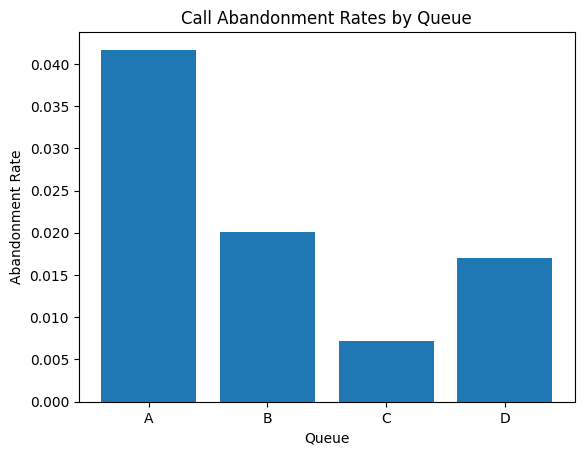

In [63]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"].iloc[i] / queue_dict["Calls"].iloc[i] 

#Your code below:

# Convert the abandonment_rates dictionary to lists
queue_names = list(abandonment_rates.keys())
abandonment_values = list(abandonment_rates.values())

plt.bar(queue_names, abandonment_values)
plt.title('Call Abandonment Rates by Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')


##### Record your answer below:

> Chart style you chose and why: I chose a bar chart. This is because we want to compare each queue to each other. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

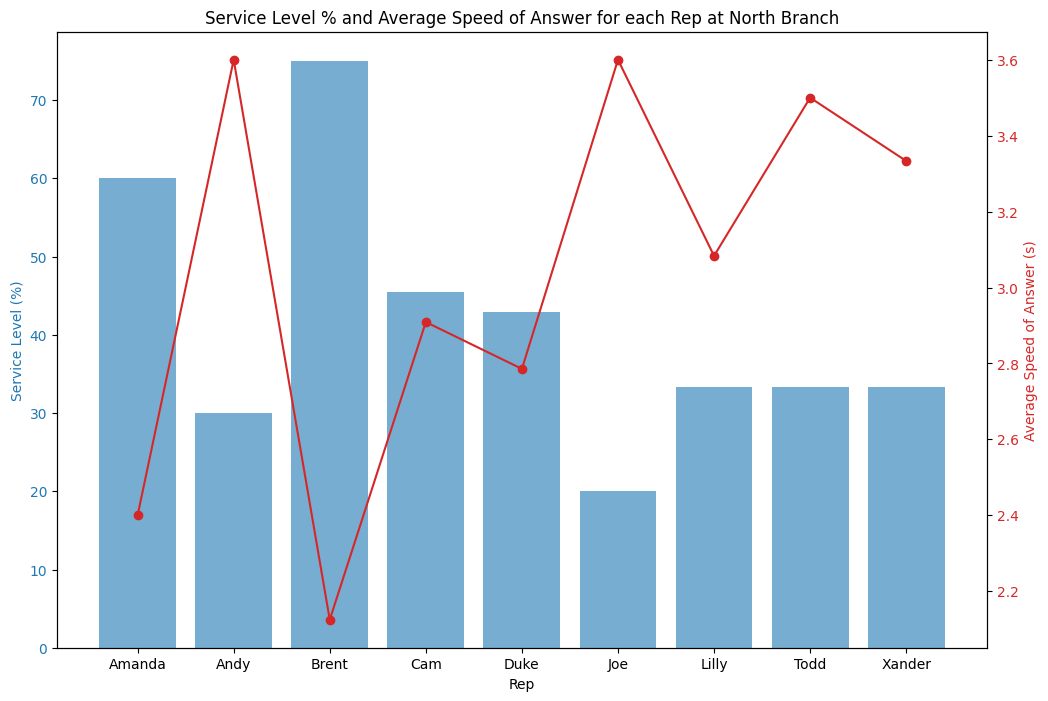

In [67]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

# Merge service level data with average speed of answer
final_df = pd.merge(north_plt, service_level, on="Rep ID")

# Plot dual-axis bar and line chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for service level percentage
color = 'tab:blue'
ax1.set_xlabel('Rep')
ax1.set_ylabel('Service Level (%)', color=color)
ax1.bar(final_df['Rep ID'], final_df['Service Level %'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Line chart for average speed of answer
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Speed of Answer (s)', color=color)
ax2.plot(final_df['Rep ID'], final_df['Incoming Wait Time'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Service Level % and Average Speed of Answer for each Rep at North Branch')
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a dual-axis chart. This was very challenging for me and took a lot of research but I felt this would best represent the data. By using a Bar chart and a line chart I was able to display the service level and average speed for each rep.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


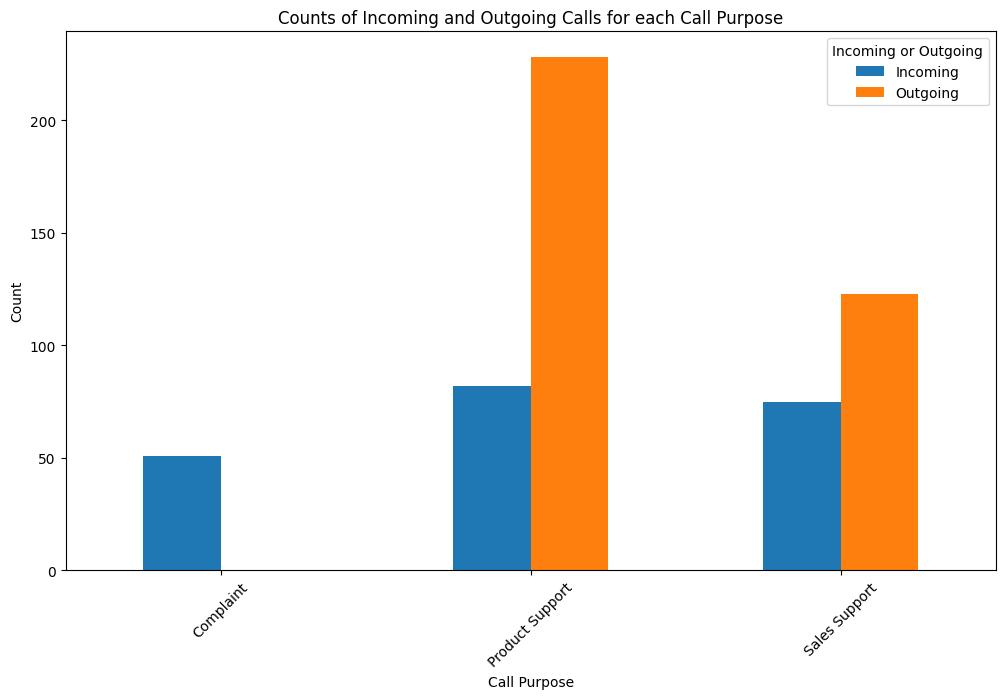

In [68]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

# Group by 'Call Purpose' and count 'Incoming or Outgoing'
purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts().unstack().fillna(0)
call_purpose = ["Complaint", "Product Support", "Sales Support"]

# Convert the counts to a DataFrame for plotting
purpose_counts_df = pd.DataFrame(purpose_counts)

# Plotting the multiple bar chart
purpose_counts_df.plot(kind='bar', figsize=(12, 7))

# Add labels and title
plt.xlabel('Call Purpose')
plt.ylabel('Count')
plt.title('Counts of Incoming and Outgoing Calls for each Call Purpose')

# Display the plot
plt.xticks(rotation=45)
plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose a compound bar chart. I chose this chart because we want to compare each call purpose to each other and incoming and outgoing calls to each other.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level, and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 
The South branch is operating more efficiently. They are beating the North branch in every metric besides calls answered within 2 seconds percentage, but all together they are answering more calls.


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
The North branch would benefit more from the extra help. The South is beating the North in almost all KPIs but they have 2 more reps than the North.

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: No, I had what I needed to answer the questions.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I chose a stacked bar chart. I did this because it clearly shows the distribution of incoming and outgoing calls for different call purposes within each time block.

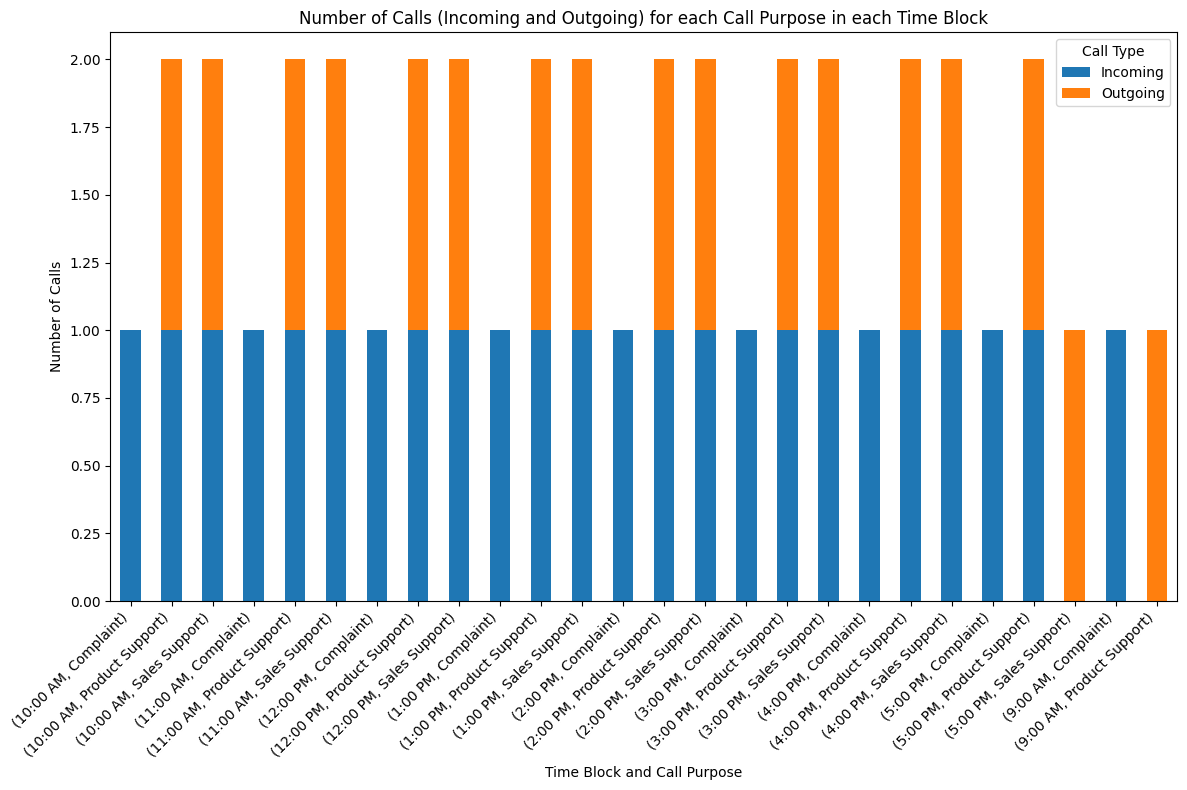

In [69]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Convert call times into pivot table
pivot_df = call_times.pivot_table(index=['Time Block', 'Call Purpose'], columns='Incoming or Outgoing', values='Calls').fillna(0)

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Number of Calls (Incoming and Outgoing) for each Call Purpose in each Time Block')
plt.xlabel('Time Block and Call Purpose')
plt.ylabel('Number of Calls')
plt.legend(title='Call Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()